In [ ]:
pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/NLP/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d quora/question-pairs-dataset --unzip


Dataset URL: https://www.kaggle.com/datasets/quora/question-pairs-dataset
License(s): other


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('questions.csv')
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
df.shape

(404351, 6)

In [ ]:
df.isnull().sum()

## have few missing values, as we have large dataset its okay if we drop them too

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
## check the data for chaegorties, check if imbalanced

is_duplicate
0    255045
1    149306
Name: count, dtype: int64


<Axes: xlabel='is_duplicate'>

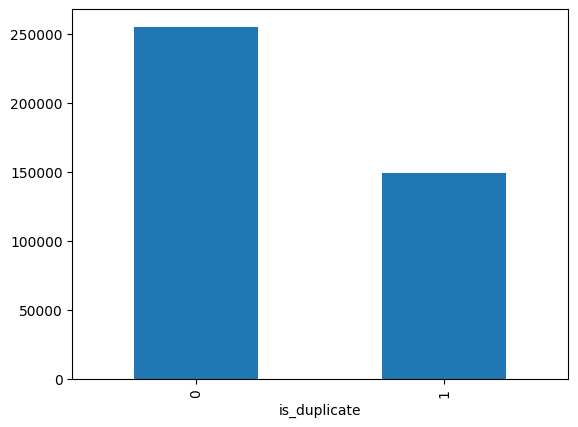

In [ ]:
print(df["is_duplicate"].value_counts())

df["is_duplicate"].value_counts().plot(kind = 'bar')

In [ ]:
## Repeated qs
qid = pd.Series(df['qid1'].tolist()+ df['qid2'].tolist())
print("Unique qs:", np.unique(qid).shape[0])

x = qid.value_counts()>1
print("No of repeated qs: ", x[x].shape[0])

## we have repeating qs count as 13698 in the dataset,
## amoung the whole qs avaliable

Unique qs: 789801
No of repeated qs:  13698


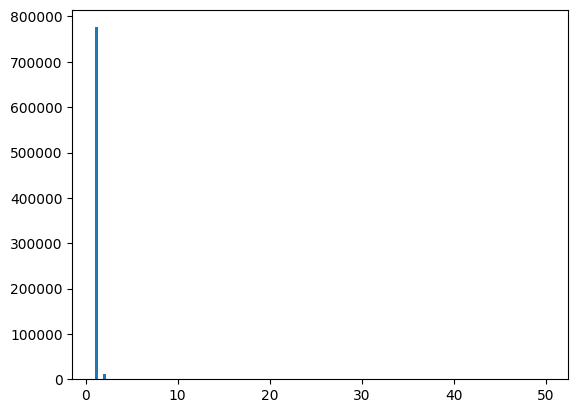

In [ ]:
plt.hist(qid.value_counts().values, bins = 160)
plt.show()

In [ ]:
## approach ---> apply bow on ques 1 and ques 2
## directly apply random forest on this

In [ ]:
### running prob : hence take a small dataset and try

df_0 = df[df['is_duplicate']==0].sample(n = 15000)
df_1 = df[df['is_duplicate']==1].sample(n = 15000)

new_df = pd.concat([df_0, df_1], axis = 0)
new_df = new_df.sample(frac=1).reset_index(drop=True)
new_df.to_csv('/content/drive/MyDrive/NLP/duplicate sent proj/new_df.csv', index=False)

In [ ]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate
0,88949,176616,176617,What is the best Java program to implement stack?,What are some good Java programs to practice w...,0
1,277672,545936,545937,Can Donald Trump still win the election?,Does Donald Trump has chamces to win US electi...,1
2,105726,209703,209704,How can one be less of an introvert?,Can one be an extrovert but also an introvert?,0
3,75188,149411,149412,People shouldn't have the right to commit suic...,Why don't we have a right to commit suicide?,1
4,15679,31293,31294,How can I make money as a 13 year old?,How can I make money as a thirteen year old?,0
...,...,...,...,...,...,...
29995,38560,76821,76822,How much money do cardiologists make per annum?,What was the SA and what is its history?,0
29996,80103,159124,159125,What are the implications of losing 10 pounds ...,Is there a safe method to lose 10 pounds in 2 ...,1
29997,278679,547881,547882,What are throwback thursdays on Instagram?,What are throwback thursdays on Instagram? How...,1
29998,138650,274477,274478,Can someone read my text messages if they bloc...,"If someone blocked me, will they still get my ...",1


In [ ]:
ques_df = new_df[['question1', "question2"]]
ques_df.head()

,question1,question2
0,What is the best Java program to implement stack?,What are some good Java programs to practice w...
1,Can Donald Trump still win the election?,Does Donald Trump has chamces to win US electi...
2,How can one be less of an introvert?,Can one be an extrovert but also an introvert?
3,People shouldn't have the right to commit suic...,Why don't we have a right to commit suicide?
4,How can I make money as a 13 year old?,How can I make money as a thirteen year old?


In [ ]:
question1 = list(ques_df['question1'])
question2 = list(ques_df['question2'])

In [ ]:
## use countvectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 3000)
q1_arr = np.array(cv.fit_transform(ques_df['question1']).toarray())
q2_arr = np.array(cv.fit_transform(ques_df['question2']).toarray())


In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index = ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index = ques_df.index)

In [ ]:
temp_df = pd.concat([temp_df1, temp_df2], axis =1)
temp_df.shape

(30000, 6000)

In [ ]:
#temp_df = pd.concat([temp_df, new_df['is_duplicate']], axis = 1)
temp_df['is_duplicate'] = new_df['is_duplicate']

In [ ]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x = temp_df.iloc[:,0:-1]
y = temp_df.iloc[:,-1]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [ ]:
## Logistic regression
model = LogisticRegression(solver = 'liblinear')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nconfusion matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy: 0.6721666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.66      0.66      2973
           1       0.67      0.69      0.68      3027

    accuracy                           0.67      6000
   macro avg       0.67      0.67      0.67      6000
weighted avg       0.67      0.67      0.67      6000


confusion matrix:
 [[1952 1021]
 [ 946 2081]]


In [ ]:
# Decision tree  classifier
model = DecisionTreeClassifier(criterion='gini', random_state=42)  # or use 'entropy'
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nconfusion matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy: 0.6576666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.67      0.66      2973
           1       0.67      0.65      0.66      3027

    accuracy                           0.66      6000
   macro avg       0.66      0.66      0.66      6000
weighted avg       0.66      0.66      0.66      6000


confusion matrix:
 [[1990  983]
 [1071 1956]]


In [ ]:
# ranfom forest classifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nconfusion matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy: 0.7375

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.75      2973
           1       0.76      0.69      0.73      3027

    accuracy                           0.74      6000
   macro avg       0.74      0.74      0.74      6000
weighted avg       0.74      0.74      0.74      6000


confusion matrix:
 [[2328  645]
 [ 930 2097]]


In [ ]:
# Xtreme gradient boost classifier
xgb = XGBClassifier()
xgb.fit(x_train.values, y_train.values)
y_pred = xgb.predict(x_test.values)
accuracy_score(y_test.values, y_pred)
print("Accuracy:", accuracy_score(y_test.values, y_pred))
print("\nClassification Report:\n", classification_report(y_test.values, y_pred))
print("\nconfusion matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy: 0.7136666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.70      0.71      2973
           1       0.71      0.73      0.72      3027

    accuracy                           0.71      6000
   macro avg       0.71      0.71      0.71      6000
weighted avg       0.71      0.71      0.71      6000


confusion matrix:
 [[2079  894]
 [ 824 2203]]
